In [1]:
import pandas as pd
df=pd.read_excel("D:/dsm/Machine Learning (Codes and Data Files)/Data/forecast.xls")
df.head()

,year,quarter,demand
0,2012,Q1,75
1,2012,Q2,60
2,2012,Q3,54
3,2012,Q4,59
4,2013,Q1,86


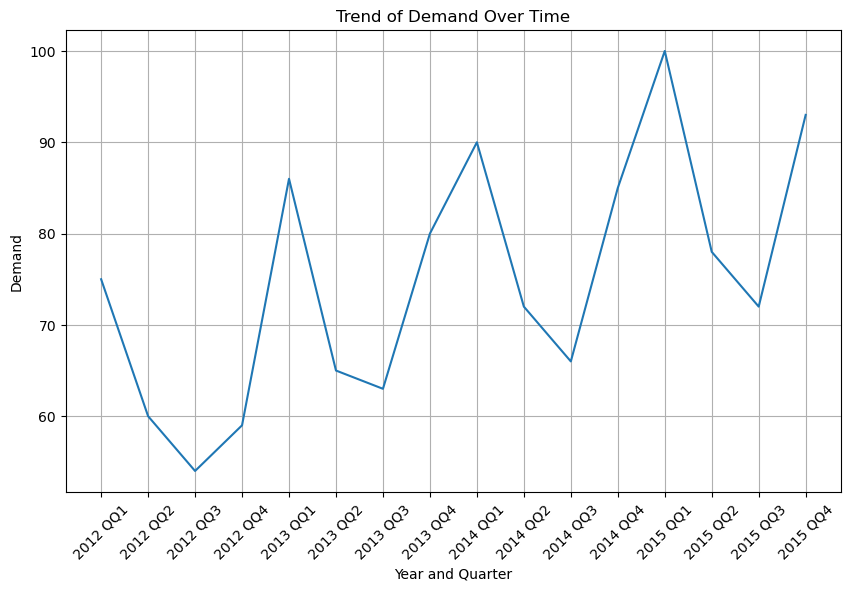

In [2]:
import matplotlib.pyplot as plt
df['YearQuarter'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

plt.figure(figsize=(10,6))
plt.plot(df['YearQuarter'], df['demand'])
plt.xticks(rotation=45)
plt.xlabel('Year and Quarter')
plt.ylabel('Demand')
plt.title('Trend of Demand Over Time')
plt.grid(True)
plt.show()


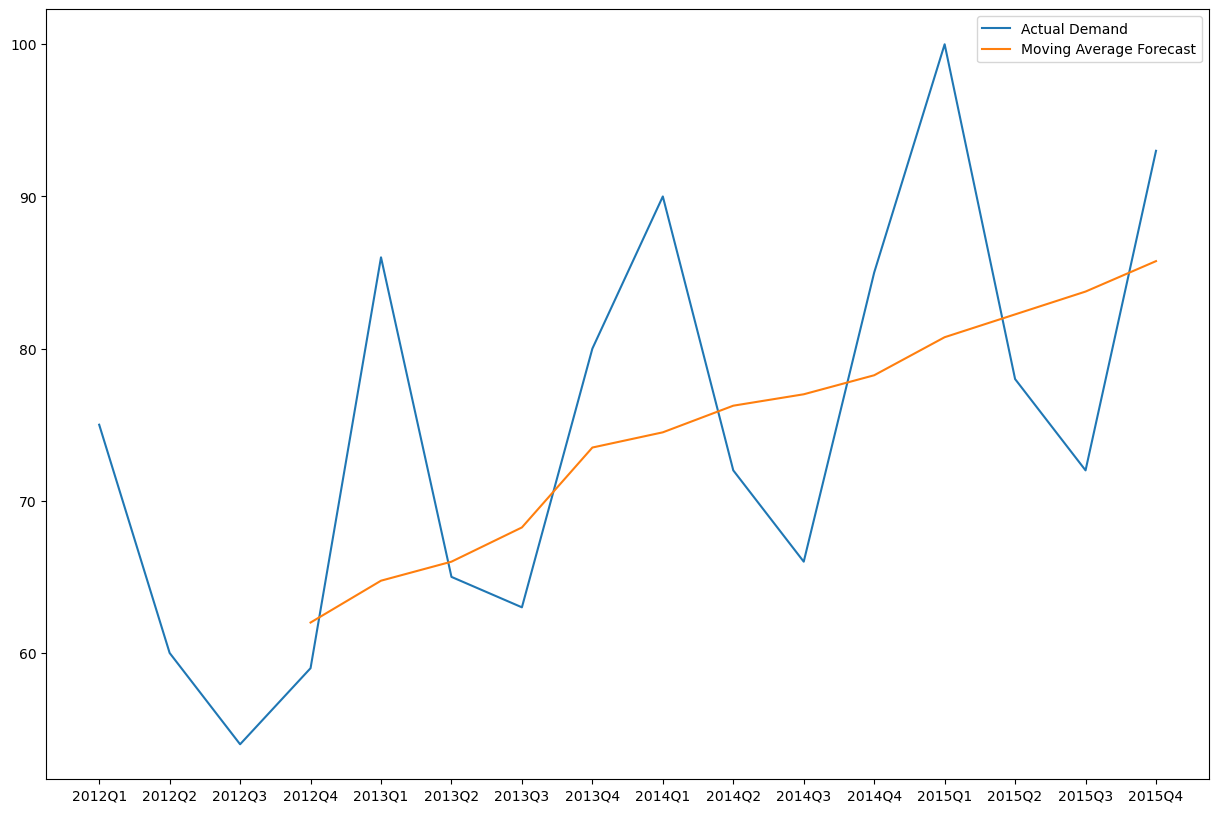

RMSE: 12.03380654655874
MAPE: 0.12203465329473394


In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming df is your DataFrame and it has columns 'year', 'quarter', 'demand'
df['year_quarter'] = df['year'].astype(str) + df['quarter']
df.set_index('year_quarter', inplace=True)

# Calculate the moving average
df['moving_avg_forecast'] = df['demand'].rolling(window=4).mean()

# Plot actual demand and moving average forecast
plt.figure(figsize=(15,10))
plt.plot(df['demand'], label='Actual Demand')
plt.plot(df['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# Assuming df_2015 is the actual demand data for 2015
df_2015 = df[df['year'] == 2015]

# Calculate RMSE and MAPE for 2015
y_true = df_2015['demand']
y_pred = df_2015['moving_avg_forecast']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


In [5]:
#exponential moving average span is four because of the 4 quarters in a year
df['EMA']= df['demand'].ewm(span=4). mean()

#next quarter forecast
next_quarter_forecast=df['EMA'].iloc[-1]


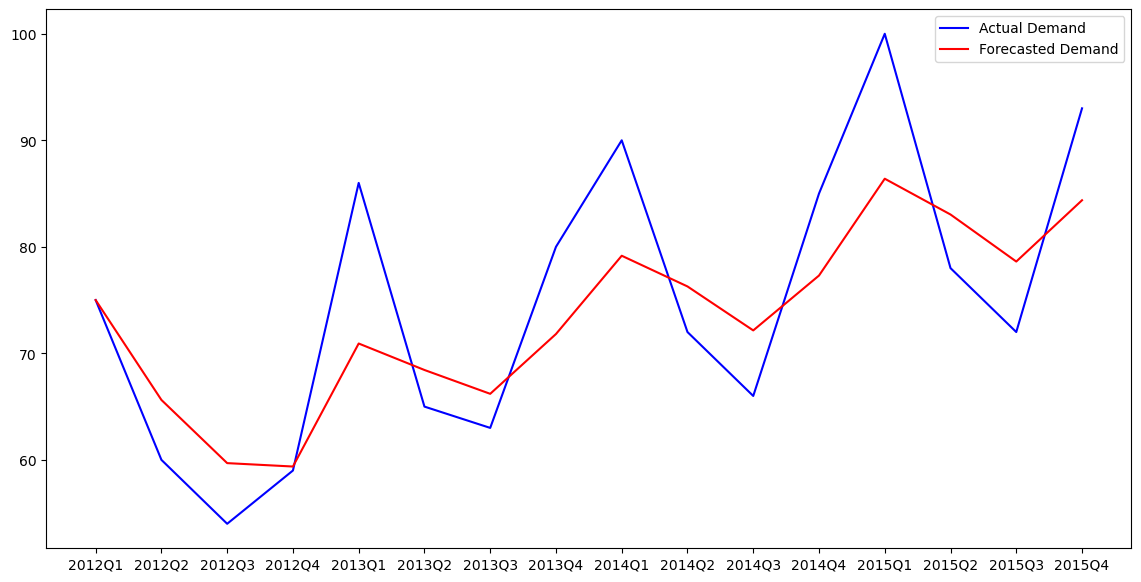

In [14]:
#plotting forecasted values against the actual demand
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['demand'], color='blue', label='Actual Demand')
plt.plot(df.index, df['EMA'], color='red', label='Forecasted Demand')
plt.legend()
plt.show()

In [8]:
#using alll quarters of 2015 to calculate RMSE and MAPE
import numpy as np
df_2015= df[df['year']==2015]
rmse= np.sqrt(mean_squared_error(df_2015['demand'], df_2015['EMA']))
mape = np.mean(np.abs((df_2015['demand'] - df_2015['EMA']) / df_2015['demand'])) * 100

print(f'RMSE for 2015: {rmse}')
print(f'MAPE for 2015: {mape}%') 

RMSE for 2015: 9.06505832945445
MAPE for 2015: 9.63207617566164%


In [15]:
#Using ARIMA 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf


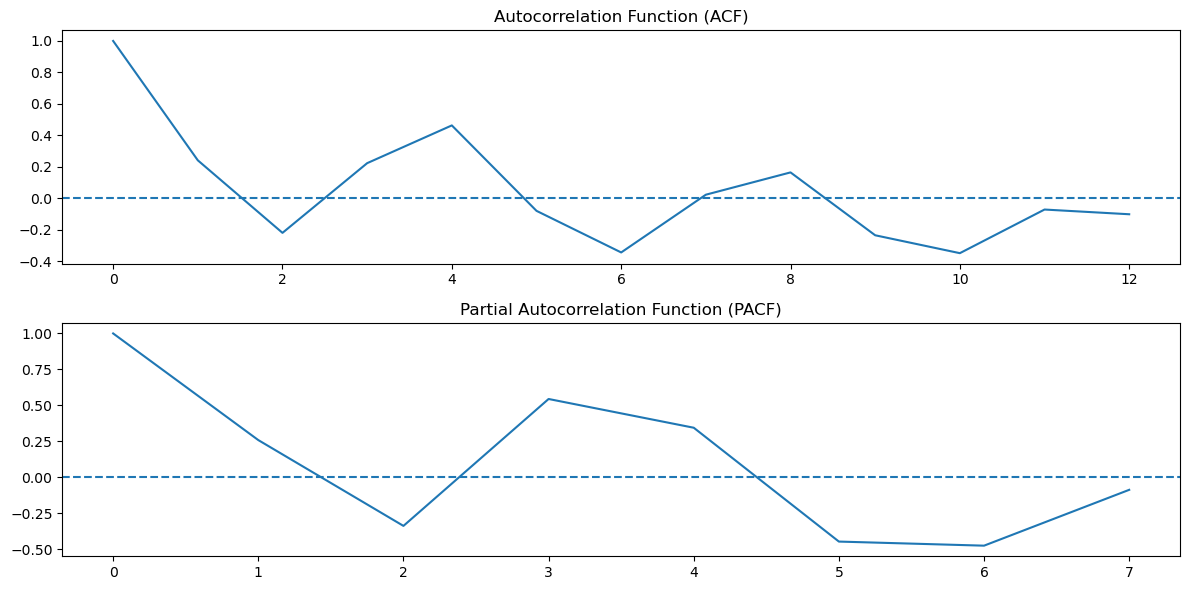

In [16]:
#ACF and PACF plots to find out p and q values
acf_vals = acf(df['demand'])
pacf_vals = pacf(df['demand'])

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(acf_vals)
plt.axhline(y=0, linestyle='--')
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plt.plot(pacf_vals)
plt.axhline(y=0, linestyle='--')
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()

In [25]:
model = ARIMA(df['demand'], order=(1,0,1))
model_fit = model.fit()

C:\Users\Admin\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible 

<AxesSubplot:xlabel='year_quarter'>

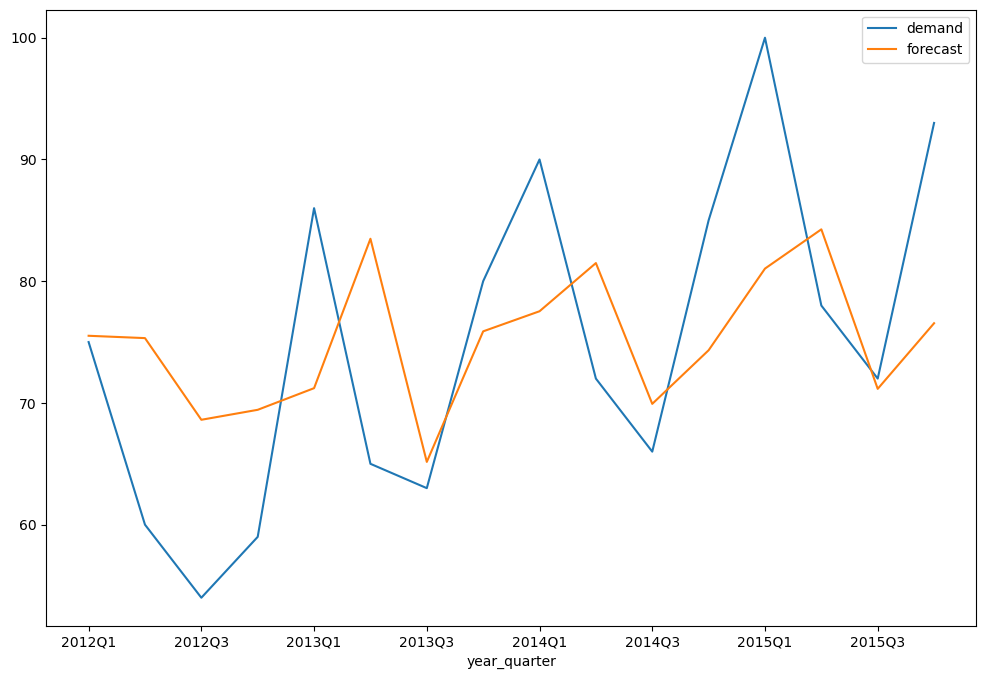

In [26]:
df['forecast'] = model_fit.predict(start=0, end=len(df)-1)
df[['demand', 'forecast']].plot(figsize=(12, 8))

In [29]:


import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming df is your DataFrame
df['date'] = pd.PeriodIndex(df['year'].astype(str) + df['quarter'], freq='Q')
df.set_index('date', inplace=True)


In [30]:
# Create a mask for the year 2015
mask = (df.index.year == 2015)

forecast_2015 = model_fit.predict(start='2015Q1', end='2015Q4')
actual_2015 = df.loc[mask, 'demand']

mse = mean_squared_error(actual_2015, forecast_2015)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_2015, forecast_2015)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 17.99774076032778
MAPE: 0.17519780454037934
